> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No show case study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Using the dataset no show appointments to predict what aspects prevents a patient from showing up to their appointment.
The dataset provides a collection of information related to the patients and their appointment.
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.>

In this case study, I will explore the dataset to find the most affecting factors on making a patient miss his/her appointment.
Focusing on No show column and it's relation with SMS confirmation , schedule date , appointment date and age.
Questions to explore:
1. Which factor has most impact on no show result?
2. Is receiving SMS confirmation from the hospital leads to more patients showing up for their appointments?
3. Are long sheduled patients more likely to not sho2 up for their appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
app_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(app_df.head(2))
print(app_df.info())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  11

>After reading the dataframe we found inconsistance in the columns names that must be addressed and incosistance in patientid column showing type float which should be int

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Studying the data within the dataset and the types of each column!)

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# for ease of access to the dataframe I will rename all columns to lowercase and replacing '-' with '_' and strip all spaces
app_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True )
# rename patientid and appointmentid to patient_id and appointment_id
app_df.rename(columns={'patientid':'patient_id' , 'appointmentid':'appointment_id'}, inplace = True)
# rename scheduledday and appointmentday to scheduled_day and appointment_day
app_df.rename(columns={'scheduledday':'scheduled_day' , 'appointmentday':'appointment_day'}, inplace = True)
#confirm changes
print(app_df.head(1))

     patient_id  appointment_id gender         scheduled_day  \
0  2.987250e+13         5642903      F  2016-04-29T18:38:08Z   

        appointment_day  age    neighbourhood  scholarship  hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handcap  sms_received no_show  
0         0           0        0             0      No  


In [4]:
# patient_id is shwoing incorrect datatype ID should be integer while it shows float further investigation required
# set option to show 9 digits after the decimal point
pd.options.display.float_format = '{:9f}'.format
# printing number of unique patient IDs
unique_patient_id = app_df.patient_id.nunique()
print(('count of unique patient IDs'),(unique_patient_id))
print(' ')
# investigating patients with decimal IDs usnig the invert operator from python to invert bits from the lambda function
true_values = [~ app_df.patient_id.apply(lambda x: x.is_integer())]
print('Array of indexes of rows has decimal value')
print(np.where(true_values)[1])
# printing values for the queried values with shown indexes
print(' ')
result = app_df.loc[[3950,  73228,  73303, 100517, 105430]]
print('Printing rows of the selected indexes')
print(result)
# removing the decimal point from the 5 entries in patient_id column assuming they are human error
# converting the column type to str to drop each decimal point
app_df['patient_id'] = app_df['patient_id'].astype(str)
app_df['patient_id'] = app_df.patient_id.str.replace('.', '')
# Confirm decimal point dropped from all 5 entries
print('Confirming decimal point dropped')
result = app_df.loc[[3950,  73228,  73303, 100517, 105430]]
print(result)
# convert patient_id column to int using to_numeric fun
app_df['patient_id'] = pd.to_numeric(app_df['patient_id'])
# confirm data type changed
print(' ')
print(('Confirm data type changed'),app_df['patient_id'].dtypes)

count of unique patient IDs 62299
 
Array of indexes of rows has decimal value
[  3950  73228  73303 100517 105430]
 
Printing rows of the selected indexes
          patient_id  appointment_id gender         scheduled_day  \
3950    93779.529270         5712759      F  2016-05-18T09:12:29Z   
73228  537615.284760         5637728      F  2016-04-29T07:19:57Z   
73303  141724.166550         5637648      M  2016-04-29T07:13:36Z   
100517  39217.844390         5751990      F  2016-05-31T10:56:41Z   
105430  43741.756520         5760144      M  2016-06-01T14:22:58Z   

             appointment_day  age   neighbourhood  scholarship  hipertension  \
3950    2016-05-18T00:00:00Z   33          CENTRO            0             0   
73228   2016-05-06T00:00:00Z   14  FORTE SÃO JOÃO            0             0   
73303   2016-05-02T00:00:00Z   12  FORTE SÃO JOÃO            0             0   
100517  2016-06-03T00:00:00Z   44    PRAIA DO SUÁ            0             0   
105430  2016-06-01T00:00:00Z 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which factpr has most impact on no show result)

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# studying which factor affects most on patient not showing up for their appointment
hyper_Noshow = (app_df.loc[(app_df['hipertension'] == 1) & (app_df['no_show'] == 'Yes')])
index_1 = hyper_Noshow.index
number_of_rows_1 = len(index_1)
print(('hipertension&no_show'),number_of_rows_1)
print(' ')
diabetes_Noshow = (app_df.loc[(app_df['diabetes'] == 1) & (app_df['no_show'] == 'Yes')])
index_2 = diabetes_Noshow.index
number_of_rows_2 = len(index_2)
print(('diabetes&no_show'),number_of_rows_2)
print(' ')
alcoholism_Noshow = (app_df.loc[(app_df['alcoholism'] == 1) & (app_df['no_show'] == 'Yes')])
index_3 = alcoholism_Noshow.index
number_of_rows_3 = len(index_3)
print(('alcoholism&no_show'),number_of_rows_3)
print(' ')
handicap_Noshow = (app_df.loc[(app_df['handcap'] == 1) & (app_df['no_show'] == 'Yes')])
index_4 = handicap_Noshow.index
number_of_rows_4 = len(index_4)
print(('handicap&no_show'),number_of_rows_4)
print(' ')
scholarship_Noshow = (app_df.loc[(app_df['scholarship'] == 1) & (app_df['no_show'] == 'Yes')])
index_5 = scholarship_Noshow.index
number_of_rows_5 = len(index_5)
print(('scholarship&no_show'),number_of_rows_5)
total_patient_att = (number_of_rows_5+number_of_rows_2+number_of_rows_3+number_of_rows_4+number_of_rows_1)
print(' ')
print('Total count for the impact on no show from all attributes')
print(total_patient_att)

hipertension&no_show 3772
 
diabetes&no_show 1430
 
alcoholism&no_show 677
 
handicap&no_show 366
 
scholarship&no_show 2578
 
Total count for the impact on no show from all attributes
8823


as a result from the previous investigation the attributes (scholarship,handicap,alcoholism,diabetes,hypertension)
don't have great impact on the no_show therefor we will exclude them from any further investigations

In [6]:
SMS_Noshow = (app_df.loc[(app_df['sms_received'] == 0) & (app_df['no_show'] == 'Yes')])
index_6 = SMS_Noshow.index
number_of_rows_6 = len(index_6)
print(('sms_received&no_show'),(' '),number_of_rows_6)

sms_received&no_show   12535


This shows relationship between patients who didn't receive SMS confirmation from hospital are more likely not to attend their appointment

### Research Question 2  (Are long sheduled patients more likely to not sho2 up for their appointments?)

In [7]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# to investigate this section we will extract the date part only from both schedule_day and appointment_day 
# and compute the difference to see the impact on no_show result by adding schedule_date and appointment_date columns 
# fisrt we need to change the datatype for appointment_date & scheduled_date from object to datetime
app_df['appointment_day'] = pd.to_datetime(app_df['appointment_day'])
app_df['scheduled_day'] = pd.to_datetime(app_df['scheduled_day'])
app_df['appointment_date'] = app_df['appointment_day'].dt.date
app_df['scheduled_date'] = app_df['scheduled_day'].dt.date
# Creating new column difference_days representing the substrcat value between schedule_date and appointment_date
app_df['difference_days'] = app_df['appointment_date']-app_df['scheduled_date']
# For ease of accessing the difference between schedule_date and appointment_date we will categorize the result 
# using pd.cut parsing in the difference_days and bin values returing the categorization using pre defined labels
# A represents same_day , B represents with in 2 days, C represents with in a week, D represents with in a month and 
# E represents above 1 month
app_df.difference_days = (app_df.difference_days.astype('timedelta64[D]')).astype(int)
app_df['difference_days_cat'] = pd.cut( app_df['difference_days'], bins = [-1, 0, 2, 7, 31, 90], labels=['A','B','C','D','E']) 

In [8]:
app_df.sample()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_date,scheduled_date,difference_days,difference_days_cat
58151,1227614647720,5704412,F,2016-05-16 15:39:39+00:00,2016-05-25 00:00:00+00:00,32,MATA DA PRAIA,0,0,0,0,0,1,No,2016-05-25,2016-05-16,9,D


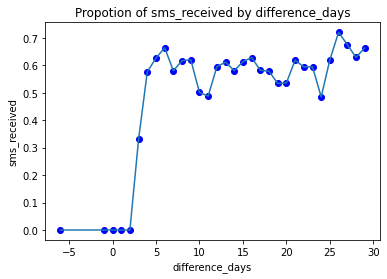

Proportion of sms_received for difference_days > 30
0.6176527269223357


In [9]:
# now we plot propotion between sms_received and difference_days
x = app_df.groupby('difference_days')['sms_received'].mean()[:32].index
y = app_df.groupby('difference_days')['sms_received'].mean()[:32].values
plt.title('Propotion of sms_received by difference_days')
plt.plot(x,y, 'bo')
plt.plot(x,y)
plt.xlabel('difference_days')
plt.ylabel('sms_received')
plt.show()

print(('Proportion of sms_received for difference_days > 30'))
print(app_df[app_df.difference_days > 30]['sms_received'].mean())

this shows the results from our previous comparison between appointment_date and schedule_date has negative values
next we will find these rows with negative values

In [10]:
app_df[app_df.difference_days < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_date,scheduled_date,difference_days,difference_days_cat
27033,78392726617520,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,2016-05-10,-1,NaN
55226,78962939678680,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,2016-05-18,-1,NaN
64175,242522583899790,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-05,-1,NaN
71533,9982315816121220,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-11,-6,NaN
72362,37874819668210,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,2016-05-04,-1,NaN


In [11]:
# for sake of consistency we will drop these 5 rows
app_df = (app_df.drop(app_df[app_df.difference_days < 0].index))

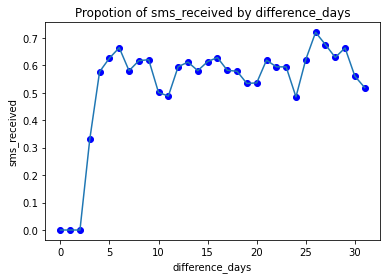

 
Proportion of sms_received for difference_days > 30
0.6176527269223357


In [12]:
# now we plot propotion between sms_received and difference_days again after droping the negative values
x = app_df.groupby('difference_days')['sms_received'].mean()[:32].index
y = app_df.groupby('difference_days')['sms_received'].mean()[:32].values
plt.title('Propotion of sms_received by difference_days')
plt.plot(x,y, 'bo')
plt.plot(x,y)
plt.xlabel('difference_days')
plt.ylabel('sms_received')
plt.show()
print(' ')
print(('Proportion of sms_received for difference_days > 30'))
print(app_df[app_df.difference_days > 30]['sms_received'].mean())

After dropping all rows with negative values we can see patients start receiving sms from hospital for difference_days > 3
this will be included on oue next phase

In [13]:
# fig above shows patients scheduled 2 days and less from the appointment date didn't receive sms from the hospital
no_show = (app_df[app_df.no_show == 'Yes']['difference_days_cat'].value_counts())
print(no_show)

D    9545
C    5057
E    3149
B    2715
A    1792
Name: difference_days_cat, dtype: int64


while A represents same day appointment these numbers show patient scheduled far from the appointment day 
more likely to miss their appointment

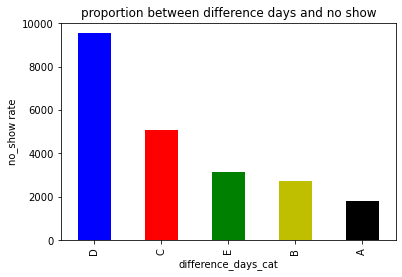

In [14]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(no_show)))
no_show.plot(kind="bar", title="test",color=my_colors);
plt.title("proportion between difference days and no show");
plt.xlabel("difference_days_cat");
plt.ylabel("no_show rate");

as shown in figure above patients scheduled far from their appointment day have more no_show rate than others,
while patients scheduled on same day of their appointment have significant less no_show rate

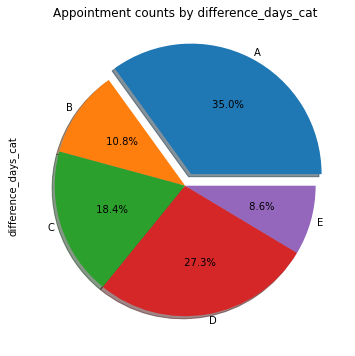

In [15]:
pie_data = app_df.difference_days_cat.value_counts().sort_index()
abel_list = pie_data.index
sizes = pie_data
fig1, ax1 = plt.subplots(figsize=(6, 6))
pie_data.plot(kind = 'pie', autopct =' %1.1f%%',explode = (0.1, 0, 0, 0, 0),pctdistance = 0.6, 
              labeldistance = 1.05, shadow = True, startangle = 0 , title='Appointment counts by difference_days_cat');

The above figure shows most of the patient had their appointments scheduled on same day

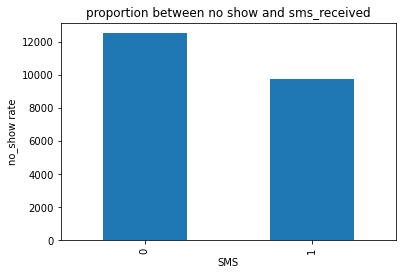

In [16]:
# next we will study the impact of not receiving sms from the hospital on no show rate
no_show_sms = (app_df[app_df.no_show == 'Yes']['sms_received'].value_counts())
no_show_sms.plot(kind = 'bar');
plt.title("proportion between no show and sms_received");
plt.xlabel("SMS");
plt.ylabel("no_show rate");

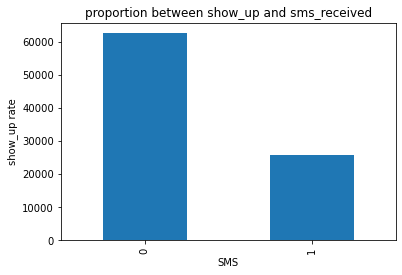

In [17]:
show_up_sms = (app_df[app_df.no_show == 'No']['sms_received'].value_counts())
show_up_sms.plot(kind = 'bar');
plt.title("proportion between show_up and sms_received");
plt.xlabel("SMS");
plt.ylabel("show_up rate");

This requires further study as patients who scheduled 0 to 2 days from appointment didn't receive sms therefor we will explode
them by filtering the dataframe with difference_days > 3

In [18]:
# copying current dataframe into new one  
app_df_copy = app_df.copy()
# filtering the new dataframe to exlode all records with difference_day < 3
app_df_copy = app_df_copy[app_df_copy.difference_days > 3]
# appending the value of no_show from (No and Yes) to (False and True) boolean
boolean_replacement = {'Yes': True, 'No': False}
app_df_copy.no_show.replace(boolean_replacement, inplace = True)
# creating new dataframe which will hold comparison for no_show true or false against sms_received true or false
compare_df = pd.DataFrame()
compare_df['no_show_1'] = (app_df_copy[app_df_copy.no_show == True]['sms_received'].value_counts())
compare_df['show_up_1'] = (app_df_copy[app_df_copy.no_show == False]['sms_received'].value_counts())
compare_df['sample_size'] = compare_df.no_show_1 + compare_df.show_up_1
compare_df['no_show_rate'] = (compare_df.no_show_1 / (compare_df.no_show_1 + compare_df.show_up_1))
compare_df.sort_index(inplace = True)
# Appending the value of sms_received from (0,1) to (False,True) boolean
compare_df.index=['False','True']

In [19]:
#reading the new dataframe with comparison values
compare_df.head(3)

,no_show_1,show_up_1,sample_size,no_show_rate
False,7572,15136,22708,0.333451
True,9591,24985,34576,0.277389


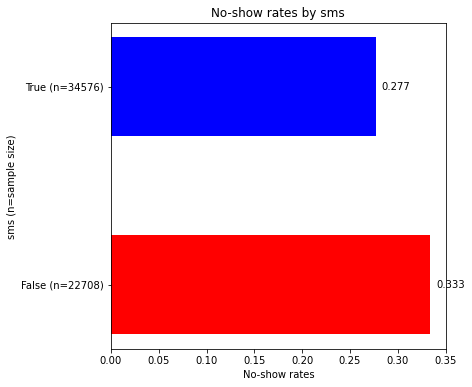

In [20]:
#plotting proportion for No-show and sms_received by passing in compare_df
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
height = 0.5
bins = np.arange(len(compare_df.index))
bars = ax.barh(bins, compare_df.no_show_rate.values, height, align = 'center',color = ['red' , 'blue'])  
ax.set_xlabel('No-show rates')
ax.set_ylabel('sms (n=sample size)')
ax.set_title('No-show rates by sms')
ax.set_yticks(bins)
labels = []
for row_number in bins:
    labels.append(str(compare_df.index[row_number]) + ' (n='+ str(compare_df.sample_size.iloc[row_number]) + ')')
ax.set_yticklabels(labels, ha = 'right',va = 'center')
for bar in bars:
    width = bar.get_width()
    ax.text(width * 1.02, bar.get_y() + (height / 2.), round(width, 3),ha = 'left', va = 'center')
plt.show()

The figure above indicates patients scheduled far from their appointment day and didn't receive sms from the hospital
are more likely to miss their apppointment than patients who received sms from the hospita.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Attributes of scholarship,hipertension,diabetes,alcoholism and handcap didn't show much impact on no-show rate on individual level, also can't take in consideration as hospital most likely ends up with huge portion of patients with these attributes

Early schedule of appointments with big gap between schedule date and appointment date has huge impact on patients missing
their appointments, hospital should take in consideration not to schedule appointments above one week

Patients who didn't receive sms confirmation from the hospital more likely not to show up especially patients scheduled
long before appoitnment date, could be due to long period patients forget about the appointment.
Hospitals should send confirmation sms upon creation of the appointment and sms reminder one day before appointment day.

limitations of this study are
1. Some Attributes don't have linear relationship with no_show and we have excluded them from our scope of investigation
2. Interrelationship between Attributes weren't investigated deeply. Multicollinearity were excluded from the scope of investigation.
3. Dataset has appointment hour as 00:00:00 due to this it was neglected and further investigation if there's a peak hour during the day with most patients don't show_up wasn't carried out.